# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [64]:
import pandas as pd
df = pd.read_csv('electric_bike_ratings_2212.csv')
df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


#### Missing Values & type check

In [65]:
df.isnull().sum()

owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


#### Owned

In [67]:
df['owned'].unique()

array([1, 0])

#### make_model

In [68]:
df['make_model'].unique()

array(['Nielah-Eyden', 'Nielah-Keetra', 'Lunna-Keetra', 'Hoang-Keetra',
       'Lunna-Eyden', 'Hoang-Eyden'], dtype=object)

#### review_month

In [69]:
df['review_month'].unique()

array(['Oct', 'Jun', '23-Oct', '07-Nov', '16-Sep', '26-Aug', '01-Mar',
       '15-Mar', '09-Mar', 'Jul', '10-Nov', 'Mar', 'Apr', 'Sep', '27-Dec',
       '11-Nov', '07-Dec', 'Feb', 'Jan', '06-Jun', '12-Jul', '02-Aug',
       '23-Feb', '27-Jul', '26-Nov', '30-Apr', '31-Jul', '22-Nov',
       '05-Sep', '05-Dec', '21-Jul', '15-Nov', '07-Jun', '20-May',
       '23-Sep', '10-Sep', '19-Oct', '28-Oct', '08-Apr', '14-Feb',
       '28-Nov', '28-Feb', '28-Jul', '12-Apr', '25-Apr', '25-Oct',
       '08-Jul', '29-Mar', '22-Sep', '26-Jun', '24-May', '12-Mar',
       '15-Feb', '28-Aug', 'May', '16-Jun', '02-Jul', '06-Feb', '21-Jun',
       'Nov', '21-Apr', '19-Jul', '31-May', '11-Aug', '14-Mar', '12-Dec',
       '02-Apr', '23-Aug', '11-Feb', '24-Aug', '03-Jun', '01-Apr',
       '24-Nov', 'Dec', '26-Mar', '22-Oct', '22-Jan', '17-Mar', '05-Oct',
       '20-Mar', '13-Jul', '03-Oct', '16-Nov', '10-Apr', '12-Aug',
       '19-Aug', '09-Oct', 'Aug', '05-Nov', '23-Dec', '06-Jul', '03-Feb',
       '21-May', '

In [70]:
df['review_month'] = df['review_month'].str.replace(r'.*-(\w+)', r'\1', regex=True)

print("Unique values:",df['review_month'].unique())
print("Number of missing values",df['review_month'].isnull().sum())

Unique values: ['Oct' 'Jun' 'Nov' 'Sep' 'Aug' 'Mar' 'Jul' 'Apr' 'Dec' 'Feb' 'Jan' 'May']
Number of missing values 0


#### web_browser

In [71]:
df['web_browser'].unique()

array(['Chrome', nan, 'IE', 'Firefox', 'Safari', 'Android', 'Opera'],
      dtype=object)

In [72]:
#Replaced with unknown
df['web_browser'] = df['web_browser'].fillna('unknown')

#### reviewer_age

In [73]:
df['reviewer_age'].unique()

array(['23', '24', '28', '41', '33', '47', '20', '32', '35', '22', '29',
       '39', '42', '36', '40', '27', '48', '34', '16', '21', '25', '30',
       '-', '46', '37', '31', '17', '44', '26', '38', '49', '50', '45',
       '19', '43', '18'], dtype=object)

In [74]:
import numpy as np
df['reviewer_age'] = df['reviewer_age'].replace('-', np.nan)
df['reviewer_age'] = pd.to_numeric(df['reviewer_age'])
mean_age = df['reviewer_age'].mean()
df['reviewer_age'] = df['reviewer_age'].fillna(mean_age).astype(int)

In [75]:
if not df['reviewer_age'].min() >= 16:
    print("Less than 16 years old")
else:
    print("Correct range")

Correct range


#### primary_use

In [76]:
df['primary_use'].unique()

array(['Commuting', 'Leisure'], dtype=object)

#### value_for_money

In [77]:
df['value_for_money'] = df['value_for_money'].str.extract(r'(\d+)/10').astype(int)

#### overall_rating

In [78]:
is_outside_range = (df['overall_rating'] < 0) | (df['overall_rating'] > 25)
if is_outside_range.any():
    print("outside range.")
else:
    print("in range.")

in range.


## Task 1 

| Column          | Match the description                                                         | Number Missing Values                                                                                | Description                                                                                                                                                                                                                                                                                                                                                                                                         |
|-----------------|-------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Owned           | Yes,the values match the description. Should be either 1 or 0.                | 0                                                                                                    | First, I have checked the number of missing values. Second, I have checked if only [0,1] exists. Third, I have checked the type of the column (int).                                                                                                                                                                                                                                                                |
| make_model      | Yes,the values match the description because only exists the expected values. | 0                                                                                                    | First, I have checked the number of missing values. Second, I have checked if only the specified models exist. Third, I have checked the type of the column (str).                                                                                                                                                                                                                                                  |
| review_month    | No,the values not match the description.                                      | 0                                                                                                    | First, I have checked the number of missing values. Secondly, I have checked if there are only the abbreviations of the month in unified format and according to the requirements. Third, I corrected with Regex the nonconforming rows. Subsequently, I have checked the column type.                                                                                                                              |
| web_browser     | No, the values not match the description                                      | 150                                                                                                  | First, I have checked the number of missing values. In this case there are 150. Secondly, I have checked if there are only the expected browsers, consequently I have replaced by unknown. Third, I have checked the column type.                                                                                                                                                                                                                           |
| reviewer_age    | No, the values not match the description                                      | There are 0 missing values, but there are some rows with '-'. Because of that, I need to correct it. | First, I have checked the number of missing values. Second, I have checked if there are only numeric values. Not having only integers, I need to pass the rows with non-numeric records to np.nan and then replace these rows with the mean. In this way, the specifications of the statement are enforced. I have made sure that the type of the column is integer and, finally, that the minimum age is 16 years. |
| primary_use     | Yes,the values match the description because only exists the expected values. | 0                                                                                                    | First, I have checked the number of missing values. Second, I have checked if there are only the values [Commuting, Leisure]. Third, I have checked the column type.                                                                                                                                                                                                                                                |
| value_for_money | No, the values not match the description                                      | 0                                                                                                    | First, I have checked the number of missing values. Second, I have checked the format of the column. As a data scientist, I decide that the format is not adequate (x/10) so using Regex I correct the format to convert it to an integer. Thirdly, I have checked the type of column that I must have corrected it.                                                                                                |
| overall_rating  | Yes,the values match the description.                                         | 0                                                                                                    | First, I have checked the number of missing values. Second, I have checked that the values are in the correct range.                                                                                                                                                                                                                                                                                                |
|                 |                                                                               |                                                                                                      |                                                                                                                                                                                                                                                                                                                                                                                                                     |



## Task 2

In [83]:
df['owned'].unique()

array([1, 0])

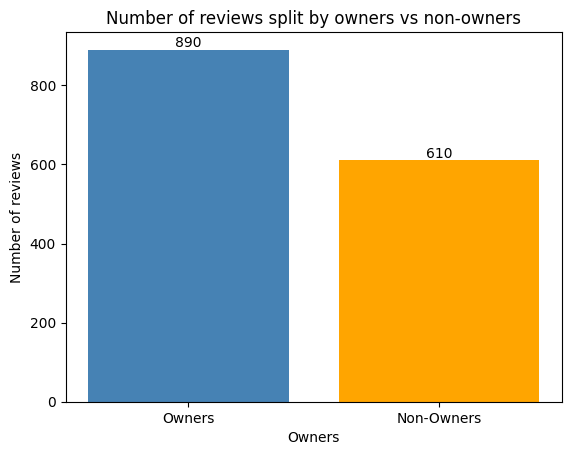

In [92]:
import matplotlib.pyplot as plt

plt.bar(
    ['Owners', 'Non-Owners'],
    df['owned'].value_counts().values, color=['steelblue', 'orange'])
plt.xlabel('Owners')
plt.ylabel('Number of reviews')
plt.title('Number of reviews split by owners vs non-owners')
for i, count in enumerate(df['owned'].value_counts().values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

The owner category has significantly more observations than the non-owner category. Therefore, it can be said that the variable `Owners` is unbalanced. The distribution of the categories is not correct and can have significant consequences for the rest of the analysis. Biased models can be created with limited representativeness, which directly impacts the quality of subsequent models. It should be considered to apply techniques such as SMOTE or other methods to balance the dataset.

## Task 3

In [106]:
import plotly.express as px
fig = px.histogram(df, x='overall_rating', nbins=10, title='Distribution of Overall Ratings')
fig.update_layout(xaxis_title='Overall Rating', yaxis_title='Frequency')
fig.update_traces(marker=dict(line=dict(color='black', width=1))) 
fig.show()

In [107]:
from scipy import stats

shapiro_test = stats.shapiro(df['overall_rating'])
if shapiro_test.pvalue > 0.05:
    print("The overall_rating are normally distributed")
else:
    print("The overall_rating are not normally distributed")    

The overall_rating are not normally distributed


In [108]:
fig = px.box(df, y='overall_rating', title='Box Plot of Overall Ratings')
fig.update_layout(yaxis_title='Overall Rating')
fig.show()

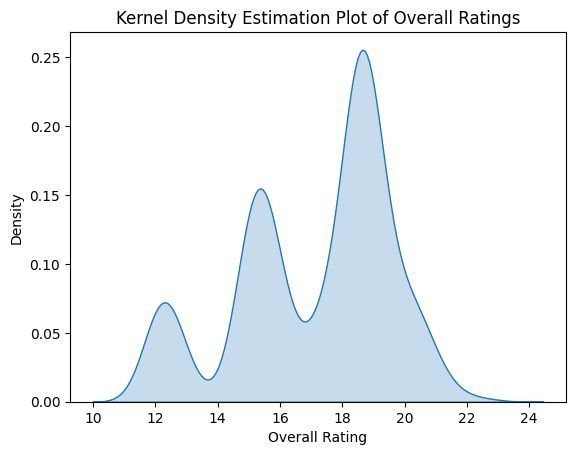

In [109]:
import seaborn as sns

sns.kdeplot(df['overall_rating'], shade=True)
plt.xlabel('Overall Rating')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plot of Overall Ratings')
plt.show()

In [110]:
df['overall_rating'].describe()

count    1500.000000
mean       17.138907
std         2.445566
min        11.690000
25%        15.320000
50%        18.240000
75%        18.840000
max        22.760000
Name: overall_rating, dtype: float64

The main graph shows how a normal distribution is not followed according to the Gaussian bell. The box plot shows how the average is very high. In the density graph, it is possible to see how there are certain scores that concentrate a more significant number of qualifications. At the same time, I have performed the Shapiro normality test, which says that there is no normality. Finally, I have given some statistics to have a more in-depth insight.

There are a total of 1500 samples with a mean of 17.13 with a deviation of about 14.7 - 19.57. It can be considered that there is a moderate dispersion. In addition, the minimum rating is 11.7 while the maximum is 22.76. 75% of the ratings rate it up to 18.84.

## Task 4

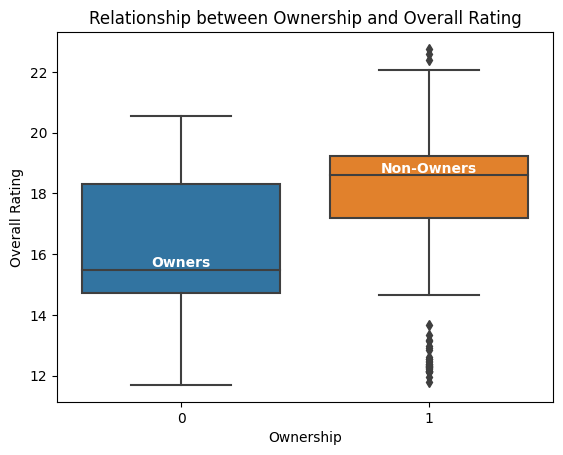

In [117]:
sns.boxplot(x='owned', y='overall_rating', data=df)
plt.xlabel('Ownership')
plt.ylabel('Overall Rating')
box_labels = ['Owners', 'Non-Owners']
box_positions = range(len(box_labels))
for position, label in zip(box_positions, box_labels):
    plt.text(position, df[df['owned'] == position]['overall_rating'].median(), label,
             ha='center', va='bottom', fontweight='bold', color='white')

plt.title('Relationship between Ownership and Overall Rating')
plt.show()

It can be observed that owners give lower ratings, while non-owners have higher ratings. Owners' ratings are approximately below 16, while non-owners' ratings are above 18. Additionally, there are ratings considered as outliers or extreme values among those provided by non-owners.

## Task 5

The problem of predicting whether a review is from an owner based on the available data can be solved using classification. It is a supervised learning task with the objective of binary classification. That is, on the one hand, if he is an owner, on the other hand, if he is not. Therefore, as a data scientist, I find the most suitable approach is a binary classification model.

## Task 6

I have implemented a Support Vector Machine (SVM) model. It is a widely used and suitable algorithm for binary classification. Essentially, it seeks to find a hyperplane that separates the data points of the two classes based on the maximum margin. I have achieved in the first round an accuracy of 0.75

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# To dummy variables
df2 = pd.get_dummies(df)

#Split features and target
X = df2.drop('owned', axis=1)
y = df2['owned']

# Split in sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train SVM
svm = SVC()
svm.fit(X_train, y_train)

#Make predictions
y_pred_svm = svm.predict(X_test)

# Review accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM:", accuracy)

Accuracy of SVM: 0.75


## Task 7
*Write your description here*

In [136]:
# Train
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Prediction
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of SVM:", accuracy)
print("The accuracy of Random Forest is:", round(accuracy_rf, 2))

Accuracy of SVM: 0.75
The accuracy of Random Forest is: 0.71


## Task 8

Initially, I chose Logistic Regression, and then Random Forest. However, in truth, Logistic Regression did not perform well compared to SVM, so I opted for the second option, which is SVM. The main reasons for choosing SVM are its ease of use, performance, and potential for future improvements. One major advantage of SVM is its resistance to overfitting and its ability to handle high-dimensional datasets. On the other hand, Random Forest has many advantages as an ensemble model. It is robust to outliers, and as seen before, there are some outlier values in the non-owner category. Therefore, considering the limitations of time to address these issues, I thought it would be suitable to proceed with the second model using Random Forest. The codes can be further improved by implementing techniques such as bagging, boosting, or even stacking.

## Task 9
*Write your description here*

In [137]:
#SVM
svm_classification_report = classification_report(y_test, y_pred_svm)

# RF
feature_importance = rf.feature_importances_

#Results
print("Accuracy of SVM:", accuracy)
print("The accuracy of Random Forest is:", round(accuracy_rf, 2))
print("------------")
print(svm_classification_report)
print("------------")
print(feature_importance)

Accuracy of SVM: 0.75
The accuracy of Random Forest is: 0.71
------------
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       114
           1       0.76      0.87      0.81       186

    accuracy                           0.75       300
   macro avg       0.74      0.71      0.72       300
weighted avg       0.75      0.75      0.74       300

------------
[0.1559821  0.14603734 0.28181309 0.02205632 0.00706691 0.02392408
 0.04628293 0.02710212 0.0087318  0.01284521 0.01378804 0.01308508
 0.01130296 0.01236559 0.01285882 0.01459467 0.01521212 0.01503036
 0.01253413 0.01444914 0.01269029 0.00301768 0.02220907 0.01698526
 0.01854765 0.00489639 0.01310279 0.01358249 0.01374434 0.01416125]


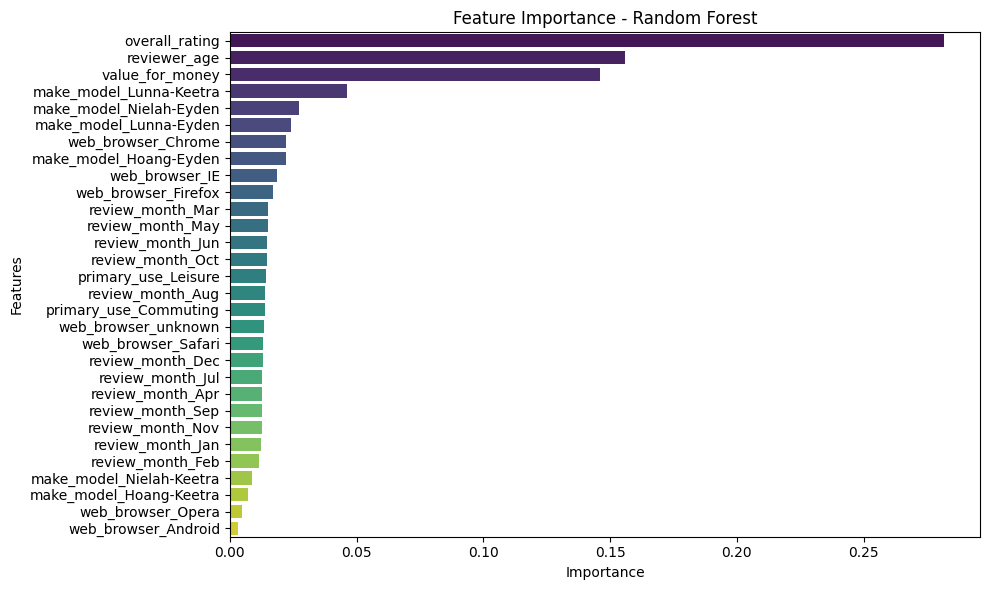

In [143]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance, y=sorted_features, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

The SVM model has an accuracy of 75%. However, RF has an accuracy of 71%. In the classification report of SVM, you can see the precision, recall, and F1-score for each class. The support shows the number of samples. For example, the precision for class 0 is 72%, while for class 1 it is 76%. The recall, which represents true positives, is 56% for class 0 and 87% for class 1. The model performs better in identifying non-owners. Lastly, the F1-score, which combines precision and recall, is 63% for class 0 and 81% for class 1. Class 1 shows a better balance. Overall, the performance is acceptable, but there are some discrepancies between classes that need to be addressed.

On the other hand, RF has shown a list of importance values for each feature. To get a better understanding, these values can be visualized in a bar plot.

## Task 10

The SVM model has a better accuracy than the RF model, specifically predicting 4% better. However, this is not the final conclusion, as we have observed that the recall for owners in SVM is lower than the recall of the RF model. In other words, SVM performs worse in classifying owners but better in classifying non-owners compared to RF. This suggests that by stacking the models, we could improve the shortcomings of each model.

Based solely on overall precision, the SVM model is better. However, when delving deeper, we have seen discrepancies between classes. Therefore, I argue that although SVM is currently performing well, it would be a good starting point for stacking. Stacking captures nonlinear relationships, reduces bias and variance, and leverages the strengths of each model. Even if the order of the models is correct, more complex models will be placed at the end and can be utilized to improve the capture of specific features.

By implementing a stacking approach, we have the potential to enhance the predictive performance and address the limitations of individual models. The combination of SVM and RF, leveraging their respective strengths, can lead to a more robust and accurate final prediction.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam